In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

### Easy  
Groupon : Describe Hypothesis Type I and Type II errors are, and the trade-offs between them.  
* 1종 오류(Type I error) : 귀무가설($H_0$)이 '참'인데도 기각하여 오류를 범하는 확률($\alpha$ error)  
* 2종 오류(Type II error) : 귀무가설($H_0$)이 '거짓'임에도 채택하는 오류($\beta$ error)
* 1종 오류와 2종 오류의 Trade-off  : 1종 오류 확률이 증가하면 2종 오류 확률은 감소한다

### Medium  
Akuna : Say you have two random variables X and Y, each with a standard deviation.  
What is the variance of aX + bY for constant a and b?  

use  
$E(aX + bY) = aE(X) + bE(Y)$  
$Var(X) = E(X^2) - [E(X)]^2$  
$Cov(X,Y) = E(XY) - E(X)E(Y)$  
cf. X and Y are independent variables, $Cov(X,Y)$ = 0

$$Var(aX + bY) = E[(aX+bY)^2] - (E[aX +bY])^2$$  
$$ = E[a^2X^2 + 2abXY + b^2Y^2] - (aE(X)+bE(Y))^2$$
$$ = (a^2E(X^2) + 2abE(XY) + b^2E(Y^2)) - (a^2[E(X)]^2 + 2abE(X)E(Y) + b^2[E(Y)]^2)$$
$$ = a^2(E(X^2) - [E(X)]^2) + b^2(E(Y^2) - [E(Y)]^2) +2ab(E(XY) - E(X)E(Y))$$
$$ = a^2Var(X) + b^2Var(Y) + 2abCov(X,Y)$$  

$$cf. Var(aX + bY) = a^2Var(X) + b^2Var(Y) \space when \space X,Y \space independent $$



### Hard  
Uber: Say you are given a random Bernoulli trial generator. How would you generate values from a standard normal distribution?  

By Central Limit Theorem, the mean of a sufficiently large sample of Bernoulli trials follows a normal distribution with mean p and standard error $\sqrt{\frac{p(1-p)}{n}}$.

$$N(m,v)\space and \space Lognormal(\mu, \sigma^2)$$
$$\mu = log(\frac{m^2}{\sqrt{v + m^2}})$$
$$\sigma = \sqrt{\frac{v}{m^2 + 1}}$$

In [169]:
def gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0):
    dt = 1/steps_per_year # 1/250 = 0.004
    n_steps = int(n_years*steps_per_year) # 1*250 = 250
    rets_plus_1 = np.random.lognormal(mean=mu, sigma=sigma, size=(n_steps, n_stocks)) # 연수익률, 표준편차를 일별수익률, 표준편차로 환산해서 , 250X3000 array 형태로 일별 수익률 무작위 추출
    rets_plus_1[0] = 1 # 초기값 1
    prices = s_0*pd.DataFrame(rets_plus_1).cumprod() # 250일 동안 누적 수익율
    return prices

(a) Plot 3000 stocks. Then plot Top 30 stocks with highest ending period price.

In [170]:
n_stocks = 3000
mu = math.log(1.031125134260799**(1/250))
sigma = math.sqrt(math.log(1.018305116529559**(2/250)))
steps_per_year = 250
s_0 = 100

In [171]:
n_years = 1
price_1y = gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0)
price_1y

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,98.884972,101.830578,100.727140,100.332462,101.098281,99.641782,100.554281,100.994047,98.950360,98.130510,...,99.739721,100.282532,98.607484,100.235535,99.415950,101.796408,100.920493,100.942506,102.373265,99.471614
2,101.078816,102.768190,101.146519,100.342797,101.219669,99.053708,102.268972,100.979840,98.311294,97.914050,...,98.369884,100.749038,99.016694,101.694709,98.434039,99.854075,100.850161,99.030515,103.651107,98.876394
3,99.594224,105.265939,103.627365,100.368110,99.620588,98.611207,100.366628,100.241722,98.232107,96.585180,...,97.998179,102.646664,99.423078,99.888029,98.022405,98.953311,102.635029,100.044008,103.117398,96.704668
4,101.429478,106.073727,103.646541,99.777324,100.970942,98.871335,103.693777,100.508951,100.618422,98.548511,...,97.834554,105.556558,98.636299,100.162113,98.928941,100.128524,103.400126,98.877732,103.727690,95.581685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,116.904176,101.700968,117.940591,86.834654,114.098219,85.066562,134.519566,86.455774,67.220589,118.793102,...,106.678719,100.708480,100.872753,88.132246,88.726068,98.257263,118.050056,103.836815,141.952583,86.256681
246,118.352665,101.070204,119.395420,88.256277,113.103500,85.185127,136.048188,86.959748,67.777093,120.115970,...,103.857260,100.464357,99.869121,88.440239,87.209943,99.137007,117.239461,103.190934,146.368292,85.569915
247,121.490813,101.835167,117.183609,87.297880,113.373983,85.677031,136.371033,86.928149,67.536103,120.999312,...,103.663245,99.906372,99.730686,87.609779,87.760187,99.142515,116.283219,102.687612,148.218106,87.624345
248,124.719296,102.501875,115.498220,86.887542,113.724249,86.305505,134.814392,84.240437,68.997524,120.454863,...,104.139069,98.435790,98.946320,87.532295,89.466448,98.575595,114.984733,102.784308,145.567743,90.340860


<AxesSubplot:>

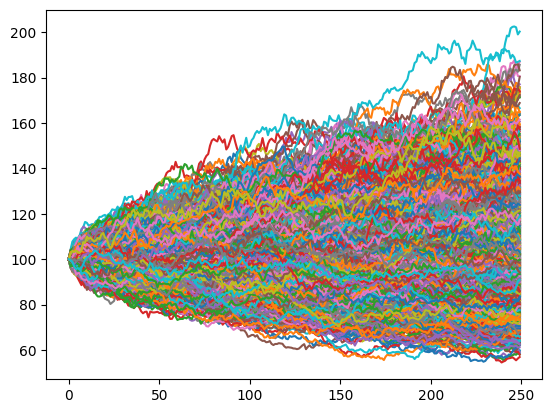

In [172]:
price_1y.plot(legend=False)

<AxesSubplot:>

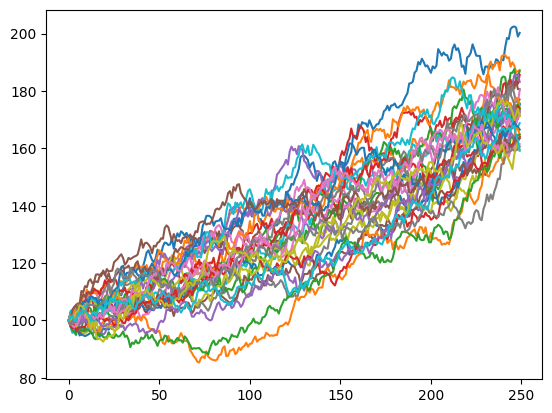

In [173]:
price_1y_30 = price_1y.T.sort_values(249, ascending = False).head(30)
price_1y_30 = price_1y_30.T
price_1y_30.plot(legend=False)

In [174]:
# Calculate the average Sharpe ratio of 3000 stocks
cagr1y = (price_1y.iloc[-1]/price_1y.iloc[0]) - 1
Sharpe1y = cagr1y.mean()/cagr1y.std()
print('Sharpe 3000 stocks(1y) :', round(Sharpe1y,2))
# Calculate the average Sharpe ratio of Top 30 stocks
cagr1y30 = (price_1y_30.iloc[-1] / price_1y_30.iloc[0]) - 1
Sharpe1y30 = cagr1y30.mean()/cagr1y30.std()
print('Sharpe 30 stocks(1y) :', round(Sharpe1y30,2))

Sharpe 3000 stocks(1y) : 0.27
Sharpe 30 stocks(1y) : 7.59


Is it okay to invest money on these 30 stocks? If not, why?
>1. 샤프비율이 높아서 MDD 값도 높을 경우 과적합 일어나 이후 기간에 대해 동일한 결과나 나올 것이라는 보장 없다.
>2. 백테스트 기간이 상대적으로 짧다.
>3. Random 표본을 추출하여 샤프비율을 구하였을 때 4 < Sharpe < 10 범위 까지 나와 안정적인 수익을 기대할 수 없다.

In [175]:
n_years = 5
price_5y = gbm(n_years, n_stocks, mu, sigma, steps_per_year, s_0)
price_5y

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,99.880844,102.603132,96.239113,99.668312,101.670457,101.107908,100.205278,100.886436,101.448266,98.667890,...,101.727951,101.398191,100.025857,99.013955,100.950107,99.512196,99.160426,102.702766,100.857398,99.323066
2,98.192114,104.310964,93.125753,98.513589,100.344647,101.305012,98.113765,102.111187,101.824697,98.531973,...,102.903404,101.156329,98.421191,98.720306,101.988981,100.079666,100.503683,100.674979,102.358304,97.870135
3,97.589910,103.556355,92.444215,97.691619,100.469355,99.109805,96.873254,101.090400,101.451144,99.340717,...,104.254906,99.792858,100.219898,97.338311,103.193202,99.036231,99.626169,102.228133,101.898150,96.390203
4,97.321167,103.885280,93.321531,98.280893,100.586758,99.004365,97.348809,101.599593,103.353792,98.976506,...,106.165866,98.035864,99.502417,96.445486,102.746163,98.223615,99.032845,102.885330,102.016830,95.608957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,156.394948,159.399917,101.817837,74.208585,74.008589,100.805416,81.748707,62.719608,146.805169,106.797224,...,96.940846,165.769074,84.274500,54.895984,181.299769,85.212453,299.185237,128.127885,95.115670,23.032059
1246,156.404752,160.076520,102.317173,75.611313,72.944186,100.091194,80.916663,63.296185,147.688541,105.940240,...,96.297972,164.280006,84.459314,53.933007,182.643702,85.165372,296.754358,131.611354,94.299286,23.194391
1247,155.690869,162.749085,104.245696,75.745956,72.790600,99.461223,80.842503,64.766859,148.269595,105.649449,...,96.255799,167.902895,84.295316,53.254156,183.054942,84.680786,299.945246,128.937485,95.602317,23.517296
1248,156.785058,164.736432,105.521989,75.040431,72.594651,98.901985,79.632374,64.519830,148.792113,107.540491,...,98.185707,166.615432,84.661367,51.986830,180.400082,84.139626,300.703480,128.384317,94.398292,23.303901


<AxesSubplot:>

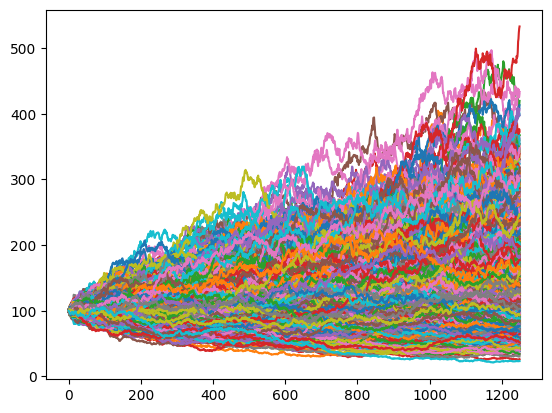

In [176]:
price_5y.plot(legend=False)

<AxesSubplot:>

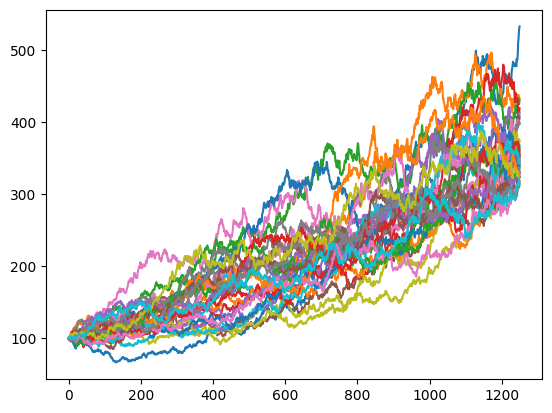

In [177]:
price_5y_30 = price_5y.T.sort_values(1249, ascending = False).head(30)
price_5y_30 = price_5y_30.T
price_5y_30.plot(legend=False)

In [178]:
# Calculate the average Sharpe ratio of 3000 stocks
cagr5y = (price_5y.iloc[-1]/price_5y.iloc[0]) - 1
Sharpe5y = cagr5y.mean()/cagr5y.std()
print('Sharpe 3000 stocks(5y) :', round(Sharpe5y,2))
# Calculate the average Sharpe ratio of Top 30 stocks 
cagr5y30 = (price_5y_30.iloc[-1] /price_5y_30.iloc[0])- 1
Sharpe5y30 = cagr5y30.mean()/cagr5y30.std()
print('Sharpe 30 stocks(5y) :', round(Sharpe5y30,2)) 

Sharpe 3000 stocks(5y) : 0.49
Sharpe 30 stocks(5y) : 5.54


What intuition we can get from these results? Think about the relation with backtesting.
>Random 표본을 추출하여 샤프비율을 구하였을 때 4 < Sharpe < 6 범위 까지 나와 1년 표본을
>사용했을 때 대비 샤프비율의 편차가 적었다.  
>즉 백테스트 했을 때 편차가 적기 때문에 이후 기간에 대해서도 일관성있는 수익률을 기대할 수 있다.